Predicting total money spent on treating different cancers based on initial costs and patient demographics

In [1]:
# https://www.kaggle.com/rishidamarla/costs-for-cancer-treatment
# https://data.world/xprizeai-health/expenditures-for-cancer-care

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
df = pd.read_csv('DowloadableDataFull_2011.01.12.csv')
df.head(5)

,Cost of Cancer Care by Phase of Care,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Costs ($) per year in millions of 2010 dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,See http://costprojections.cancer.gov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and l...,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
3,AllSites,2010,Both sexes,All ages,"Incidence, Survival at constant rate",0%,124565.6,40463.5,46642.8,37459.2
4,AllSites,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0%,122420.8,38552.7,46671.9,37196.3


#### Cleaning

In [5]:
# clearing unnecessary rows
df = df.iloc[2:]

# setting the column names
df.columns = df.iloc[0]

# dropping the extra row
df = df.drop(df.index[0])

# resetting the index to 0
df = df.reset_index(drop=True)

In [6]:
df.head(5)

2,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,All ages,"Incidence, Survival at constant rate",0%,124565.6,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0%,122420.8,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0%,125397.7,40463.5,47136.3,37797.9
3,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0%,123236.3,38552.7,47155.7,37527.8
4,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",2%,123236.3,38552.7,47155.7,37527.8


In [7]:
df.sample(10)

2,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
304,Melanoma,2012,Both sexes,All ages,"Incidence, Survival follow recent trends",2%,2735.8,632.4,1719.2,384.2
109,Other,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0%,20599.0,4430.3,10925.6,5243.1
220,Uterus,2011,Both sexes,All ages,"Incidence, Survival follow recent trends",2%,2598.4,1036.9,787.0,774.4
522,Lymphoma,2014,Both sexes,All ages,"Incidence, Survival at constant rate",0%,13375.1,3372.5,5418.7,4583.9
1078,Kidney,2019,Both sexes,All ages,"Incidence, Survival follow recent trends",2%,6611.9,2124.5,2503.0,1984.4
744,Lung,2016,Both sexes,All ages,"Incidence, Survival at constant rate",0%,13648.0,5926.7,2076.2,5645.0
27,Cervix,2010,Females,All ages,"Incidence, Survival follow recent trends",0%,1394.4,386.0,355.7,652.6
979,Lymphoma,2018,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0%,14415.1,3488.6,5891.4,5035.1
285,Leukemia,2012,Both sexes,All ages,"Incidence, Survival follow recent trends",0%,5631.6,781.3,2203.2,2647.1
1000,Pancreas,2018,Both sexes,All ages,"Incidence, Survival follow recent trends",2%,3413.0,1938.7,200.1,1274.2


In [8]:
df.isna().sum()

2
Cancer Site                                                  0
Year                                                         0
Sex                                                          0
Age                                                          0
Incidence and Survival Assumptions                           0
Annual Cost Increase (applied to initial and last phases)    0
Total Costs                                                  0
Initial Year After Diagnosis Cost                            0
Continuing Phase Cost                                        0
Last Year of Life Cost                                       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Cancer Site                                                1254 non-null   object
 1   Year                                                       1254 non-null   object
 2   Sex                                                        1254 non-null   object
 3   Age                                                        1254 non-null   object
 4   Incidence and Survival Assumptions                         1254 non-null   object
 5   Annual Cost Increase (applied to initial and last phases)  1254 non-null   object
 6   Total Costs                                                1254 non-null   object
 7   Initial Year After Diagnosis Cost                          1254 non-null   object
 8   Continuing Phase C

In [10]:
df.iloc[:, [0,1,2,3,4]]

2,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions
0,AllSites,2010,Both sexes,All ages,"Incidence, Survival at constant rate"
1,AllSites,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant"
2,AllSites,2010,Both sexes,All ages,"Survival follows recent trend, Incidence constant"
3,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends"
4,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends"
...,...,...,...,...,...
1249,Other,2020,Both sexes,All ages,"Incidence follows recent trend, Survival constant"
1250,Other,2020,Both sexes,All ages,"Survival follows recent trend, Incidence constant"
1251,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends"
1252,Other,2020,Both sexes,All ages,"Incidence, Survival follow recent trends"


In [11]:
cats = list(df.columns[0:5])
cats

['Cancer Site', 'Year', 'Sex', 'Age', 'Incidence and Survival Assumptions']

In [12]:
nums = list(df.columns[5:])
nums

['Annual Cost Increase (applied to initial and last phases)',
 'Total Costs',
 'Initial Year After Diagnosis Cost',
 'Continuing Phase Cost',
 'Last Year of Life Cost']

In [13]:
for i in cats:
    print(df[i].value_counts())

Stomach       66
Pancreas      66
Esophagus     66
Other         66
Leukemia      66
Kidney        66
Brain         66
Colorectal    66
Cervix        66
Melanoma      66
Uterus        66
Head_Neck     66
Lymphoma      66
Bladder       66
Breast        66
Ovary         66
Prostate      66
AllSites      66
Lung          66
Name: Cancer Site, dtype: int64
2013    114
2016    114
2012    114
2020    114
2011    114
2015    114
2018    114
2019    114
2014    114
2010    114
2017    114
Name: Year, dtype: int64
Both sexes    990
Females       198
Males          66
Name: Sex, dtype: int64
All ages    1254
Name: Age, dtype: int64
Incidence, Survival follow recent trends             627
Survival follows recent trend, Incidence constant    209
Incidence, Survival at constant rate                 209
Incidence follows recent trend, Survival constant    209
Name: Incidence and Survival Assumptions, dtype: int64


In [14]:
df.shape

(1254, 10)

In [15]:
print(df['Annual Cost Increase (applied to initial and last phases)'].value_counts())
print(df.loc[10, 'Annual Cost Increase (applied to initial and last phases)'][:-1])
for i in range(len(df)):
    df.loc[i, 'Annual Cost Increase (applied to initial and last phases)'] = df.loc[i, 'Annual Cost Increase (applied to initial and last phases)'][:-1]

0%    836
2%    209
5%    209
Name: Annual Cost Increase (applied to initial and last phases), dtype: int64
2


In [16]:
print(df.loc[10, 'Annual Cost Increase (applied to initial and last phases)'])
print(df['Annual Cost Increase (applied to initial and last phases)'].value_counts())

2
0    836
5    209
2    209
Name: Annual Cost Increase (applied to initial and last phases), dtype: int64


In [17]:
for i in nums:
    df[i] = df[i].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Cancer Site                                                1254 non-null   object 
 1   Year                                                       1254 non-null   object 
 2   Sex                                                        1254 non-null   object 
 3   Age                                                        1254 non-null   object 
 4   Incidence and Survival Assumptions                         1254 non-null   object 
 5   Annual Cost Increase (applied to initial and last phases)  1254 non-null   float64
 6   Total Costs                                                1254 non-null   float64
 7   Initial Year After Diagnosis Cost                          1254 non-null   float64
 8   Continui

In [19]:
df.iloc[:, 5:].describe()

2,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,1.166667,15221.008852,4677.505742,5764.655024,4778.848804
std,1.864133,31489.503603,9703.258460,12094.699099,9930.281985
min,0.000000,1204.600000,293.000000,98.900000,330.600000
25%,0.000000,2866.625000,939.175000,846.875000,908.925000
50%,0.000000,5107.350000,1377.150000,1940.350000,1755.200000
75%,2.000000,14178.925000,4883.050000,5187.200000,4465.275000
max,5.000000,206587.100000,68858.000000,66099.700000,74159.700000


In [20]:
df.iloc[:, 5:].corr()

2,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
2,,,,,
Annual Cost Increase (applied to initial and last phases),1.000000,0.026826,0.039405,0.002160,0.043933
Total Costs,0.026826,1.000000,0.993141,0.991058,0.993552
Initial Year After Diagnosis Cost,0.039405,0.993141,1.000000,0.973080,0.986996
Continuing Phase Cost,0.002160,0.991058,0.973080,1.000000,0.973907
Last Year of Life Cost,0.043933,0.993552,0.986996,0.973907,1.000000


In [21]:
df['Age'].value_counts()

All ages    1254
Name: Age, dtype: int64

In [22]:
df.drop('Age', axis=1, inplace=True)

In [23]:
df.head(4)

2,Cancer Site,Year,Sex,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,"Incidence, Survival at constant rate",0.0,124565.6,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,"Incidence follows recent trend, Survival constant",0.0,122420.8,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,"Survival follows recent trend, Incidence constant",0.0,125397.7,40463.5,47136.3,37797.9
3,AllSites,2010,Both sexes,"Incidence, Survival follow recent trends",0.0,123236.3,38552.7,47155.7,37527.8


#### Exploring the Data

In [35]:
# total costs average
print('Total Costs Average:', df['Total Costs'].mean())

# initial cost average
print('Initial Cost Average:', df['Initial Year After Diagnosis Cost'].mean())


Total Costs Average: 15221.008851674627
Initial Cost Average: 4677.50574162679


In [43]:
print('Total Costs Average by Year:')
df['Total Costs'].groupby(df['Year']).mean()

Total Costs Average by Year:


Year
2010    13019.171053
2011    13427.294737
2012    13844.892105
2013    14267.221053
2014    14704.259649
2015    15145.877193
2016    15613.532456
2017    16094.852632
2018    16588.141228
2019    17101.342982
2020    17624.512281
Name: Total Costs, dtype: float64

In [44]:
print('Initial Costs Average by Year:')
df['Initial Year After Diagnosis Cost'].groupby(df['Year']).mean()

Initial Costs Average by Year:


Year
2010    4125.221053
2011    4225.286842
2012    4328.561404
2013    4434.014912
2014    4543.412281
2015    4656.567544
2016    4775.001754
2017    4897.270175
2018    5022.993860
2019    5153.554386
2020    5290.678947
Name: Initial Year After Diagnosis Cost, dtype: float64

In [51]:
print('Initial Cost to Total Costs Ratio:')
df['Initial Year After Diagnosis Cost'].groupby(df['Year']).mean() / df['Total Costs'].groupby(df['Year']).mean()

Initial Cost to Total Costs Ratio:


Year
2010    0.316857
2011    0.314679
2012    0.312647
2013    0.310783
2014    0.308986
2015    0.307448
2016    0.305825
2017    0.304276
2018    0.302806
2019    0.301354
2020    0.300189
dtype: float64

In [47]:
# tc = np.array(df['Total Costs'].groupby(df['Year']).mean())
# ic = np.array(df['Initial Year After Diagnosis Cost'].groupby(df['Year']).mean())
# ic / tc

array([0.31685743, 0.31467894, 0.31264681, 0.31078336, 0.30898613,
       0.30744786, 0.30582456, 0.30427555, 0.30280631, 0.30135378,
       0.30018867])

In [71]:
# total costs average grouped by site
print('Total Costs Average by Site:')
print(df['Total Costs'].groupby(df['Cancer Site']).mean().sort_values(ascending=False))

print('\n')

# initial cost average grouped by site
print('Initial Cost Average by Site:')
print(df['Initial Year After Diagnosis Cost'].groupby(df['Cancer Site']).mean().sort_values(ascending=False))

Total Costs Average by Site:
Cancer Site
AllSites      144599.589394
Other          25519.486364
Breast         18525.166667
Colorectal     15131.101515
Lymphoma       14252.680303
Prostate       13977.395455
Lung           13113.968182
Leukemia        6373.959091
Brain           5280.210606
Ovary           5200.456061
Kidney          5045.562121
Bladder         4368.340909
Head_Neck       3947.369697
Melanoma        3058.759091
Uterus          2840.590909
Pancreas        2826.672727
Stomach         1982.736364
Esophagus       1713.387879
Cervix          1441.734848
Name: Total Costs, dtype: float64


Initial Cost Average by Site:
Cancer Site
AllSites      44436.300000
Breast         6441.813636
Colorectal     6114.137879
Lung           5519.134848
Prostate       5357.566667
Other          4688.096970
Lymphoma       3604.862121
Pancreas       1681.503030
Kidney         1555.842424
Brain          1411.780303
Uterus         1180.363636
Ovary          1165.466667
Head_Neck      1131.67121

In [99]:
z = (df['Initial Year After Diagnosis Cost'].groupby(df['Cancer Site']).mean()/df['Total Costs'].groupby(df['Cancer Site']).mean()).sort_values(ascending=False)
print('Initial Cost to Total Costs Ratio by Site:')
print(z)

Initial Cost to Total Costs Ratio by Site:
Cancer Site
Pancreas      0.594870
Stomach       0.433694
Lung          0.420859
Uterus        0.415535
Colorectal    0.404078
Esophagus     0.393252
Prostate      0.383302
Breast        0.347733
Kidney        0.308359
AllSites      0.307306
Head_Neck     0.286690
Cervix        0.285566
Brain         0.267372
Lymphoma      0.252925
Bladder       0.246041
Ovary         0.224109
Melanoma      0.222676
Other         0.183707
Leukemia      0.138495
dtype: float64


In [73]:
# total costs average grouped by site
print('Total Costs Average by Incidence and Survival Assumption:')
print(df['Total Costs'].groupby(df['Incidence and Survival Assumptions']).mean().sort_values(ascending=False))

print('\n')

# initial cost average grouped by site
print('Initial Cost Average by Incidence and Survival Assumption:')
print(df['Initial Year After Diagnosis Cost'].groupby(df['Incidence and Survival Assumptions']).mean().sort_values(ascending=False))

Total Costs Average by Incidence and Survival Assumption:
Incidence and Survival Assumptions
Incidence, Survival follow recent trends             15688.738596
Survival follows recent trend, Incidence constant    15211.977990
Incidence, Survival at constant rate                 14828.424402
Incidence follows recent trend, Survival constant    14219.434928
Name: Total Costs, dtype: float64


Initial Cost Average by Incidence and Survival Assumption:
Incidence and Survival Assumptions
Incidence, Survival follow recent trends             4828.202711
Incidence, Survival at constant rate                 4663.590431
Survival follows recent trend, Incidence constant    4663.590431
Incidence follows recent trend, Survival constant    4253.245455
Name: Initial Year After Diagnosis Cost, dtype: float64


In [109]:
# total costs average grouped by annual cost increase
print('Total Costs Average by Cost Increase:')
print(df['Total Costs'].groupby(df['Annual Cost Increase (applied to initial and last phases)']).mean().sort_values(ascending=False))

print('\n')

# initial cost average grouped by annual cost increase
print('Initial Cost Average by Cost Increase:')
print(df['Initial Year After Diagnosis Cost'].groupby(df['Annual Cost Increase (applied to initial and last phases)']).mean().sort_values(ascending=False))

Total Costs Average by Cost Increase:
Annual Cost Increase (applied to initial and last phases)
5.0    17009.995694
2.0    15468.967943
0.0    14711.772368
Name: Total Costs, dtype: float64


Initial Cost Average by Cost Increase:
Annual Cost Increase (applied to initial and last phases)
5.0    5517.673206
2.0    4713.689474
0.0    4458.417943
Name: Initial Year After Diagnosis Cost, dtype: float64


In [111]:
# total costs average grouped by sex
print('Total Costs Average by Sex:')
print(df['Total Costs'].groupby(df['Sex']).mean().sort_values(ascending=False))

print('\n')

# initial cost average grouped by sex
print('Initial Cost Average by Sex:')
print(df['Initial Year After Diagnosis Cost'].groupby(df['Sex']).mean().sort_values(ascending=False))

Total Costs Average by Sex:
Sex
Both sexes    16670.294343
Males         13977.395455
Females        8389.119192
Name: Total Costs, dtype: float64


Initial Cost Average by Sex:
Sex
Males         5357.566667
Both sexes    5033.070101
Females       2672.996970
Name: Initial Year After Diagnosis Cost, dtype: float64


#### Plots

In [ ]:
# freq plot of cancer sites

<AxesSubplot:>

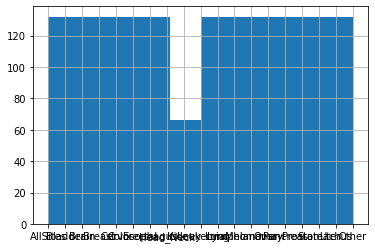

In [112]:
df['Cancer Site'].hist()

In [ ]:
# freq plot of year

<AxesSubplot:>

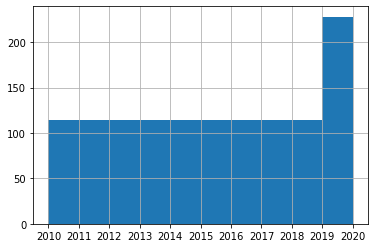

In [113]:
df['Year'].hist()

In [ ]:
# initial costs (x) and sex (y) dot chart

<AxesSubplot:xlabel='Initial Year After Diagnosis Cost', ylabel='Annual Cost Increase (applied to initial and last phases)'>

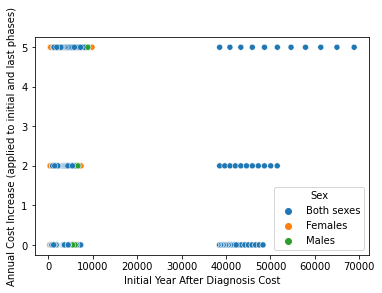

In [117]:
sns.scatterplot(data=df, x="Initial Year After Diagnosis Cost", y="Annual Cost Increase (applied to initial and last phases)", hue="Sex")

<AxesSubplot:xlabel='Annual Cost Increase (applied to initial and last phases)', ylabel='Initial Year After Diagnosis Cost'>

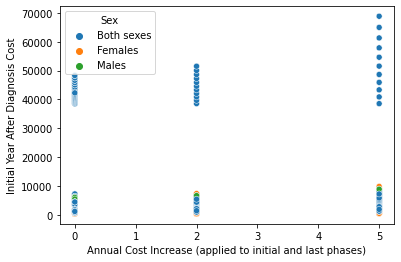

In [120]:
sns.scatterplot(data=df, x="Annual Cost Increase (applied to initial and last phases)", y="Initial Year After Diagnosis Cost", hue="Sex")

In [ ]:
# initial year costs (x) and annual cost increase (y)

<AxesSubplot:xlabel='Initial Year After Diagnosis Cost', ylabel='Annual Cost Increase (applied to initial and last phases)'>

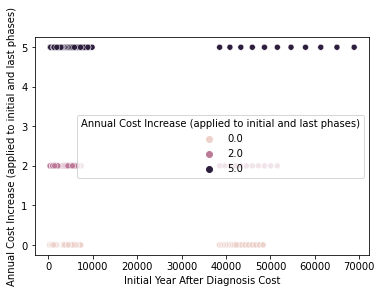

In [119]:
sns.scatterplot(data=df, x="Initial Year After Diagnosis Cost", y="Annual Cost Increase (applied to initial and last phases)", hue="Annual Cost Increase (applied to initial and last phases)")

In [ ]:
# total costs by gender

<AxesSubplot:xlabel='Total Costs', ylabel='Sex'>

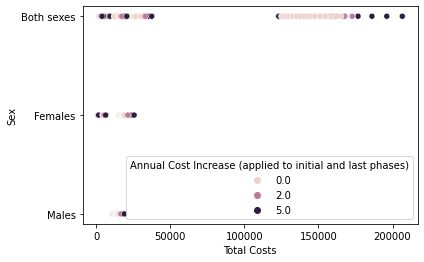

In [122]:
sns.scatterplot(data=df, x="Total Costs", y="Sex", hue="Annual Cost Increase (applied to initial and last phases)")

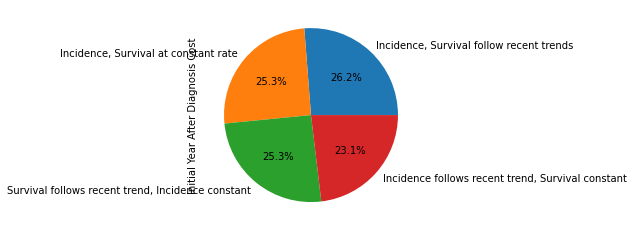

In [129]:
# incidence survival pie chart
p1 = df['Initial Year After Diagnosis Cost'].groupby(df['Incidence and Survival Assumptions']).mean().sort_values(ascending=False)
p1.plot.pie(autopct="%.1f%%");

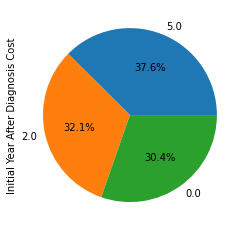

In [130]:
# annual cost increase
p2 = df['Initial Year After Diagnosis Cost'].groupby(df['Annual Cost Increase (applied to initial and last phases)']).mean().sort_values(ascending=False)
p2.plot.pie(autopct="%.1f%%");

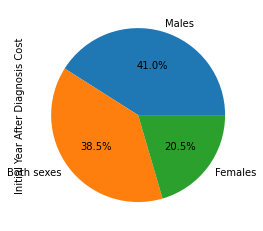

In [131]:
# sex pie chart
p3 = df['Initial Year After Diagnosis Cost'].groupby(df['Sex']).mean().sort_values(ascending=False)
p3.plot.pie(autopct="%.1f%%");

Will come back to plots

#### Feature Transformation and Engineering

In [132]:
data = df.copy()

In [133]:
data.head(3)

2,Cancer Site,Year,Sex,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,"Incidence, Survival at constant rate",0.0,124565.6,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,"Incidence follows recent trend, Survival constant",0.0,122420.8,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,"Survival follows recent trend, Incidence constant",0.0,125397.7,40463.5,47136.3,37797.9


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 9 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Cancer Site                                                1254 non-null   object 
 1   Year                                                       1254 non-null   object 
 2   Sex                                                        1254 non-null   object 
 3   Incidence and Survival Assumptions                         1254 non-null   object 
 4   Annual Cost Increase (applied to initial and last phases)  1254 non-null   float64
 5   Total Costs                                                1254 non-null   float64
 6   Initial Year After Diagnosis Cost                          1254 non-null   float64
 7   Continuing Phase Cost                                      1254 non-null   float64
 8   Last Year

In [ ]:
# split dataset into cols and label

In [141]:
total_costs_label = data['Total Costs'].values

In [143]:
data_cols = data.drop(columns='Total Costs', axis=1)

In [144]:
data_cols.head(3)

2,Cancer Site,Year,Sex,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,"Incidence, Survival at constant rate",0.0,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,"Incidence follows recent trend, Survival constant",0.0,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,"Survival follows recent trend, Incidence constant",0.0,40463.5,47136.3,37797.9


In [149]:
# drop last two columns
# the last three columns sum to the label data
# dropping continuing phase and last year of life costs (last two columns) and making predictions based off of initial year costs
# and remaining columns, as well as feature engineered columns

data_cols = data_cols.drop(columns=['Continuing Phase Cost', 'Last Year of Life Cost'], axis=1)
data_cols.head(8)

2,Cancer Site,Year,Sex,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Initial Year After Diagnosis Cost
0,AllSites,2010,Both sexes,"Incidence, Survival at constant rate",0.0,40463.5
1,AllSites,2010,Both sexes,"Incidence follows recent trend, Survival constant",0.0,38552.7
2,AllSites,2010,Both sexes,"Survival follows recent trend, Incidence constant",0.0,40463.5
3,AllSites,2010,Both sexes,"Incidence, Survival follow recent trends",0.0,38552.7
4,AllSites,2010,Both sexes,"Incidence, Survival follow recent trends",2.0,38552.7
5,AllSites,2010,Both sexes,"Incidence, Survival follow recent trends",5.0,38552.7
6,Bladder,2010,Both sexes,"Incidence, Survival at constant rate",0.0,978.7
7,Bladder,2010,Both sexes,"Incidence follows recent trend, Survival constant",0.0,923.3


In [160]:
# square initial year cost
data_cols['Initial Cost Squared'] = data_cols['Initial Year After Diagnosis Cost']**2

In [161]:
data_cols.head(3)

2,Cancer Site,Year,Sex,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Initial Year After Diagnosis Cost,Initial Cost Squared
0,AllSites,2010,Both sexes,"Incidence, Survival at constant rate",0.0,40463.5,1.637295e+09
1,AllSites,2010,Both sexes,"Incidence follows recent trend, Survival constant",0.0,38552.7,1.486311e+09
2,AllSites,2010,Both sexes,"Survival follows recent trend, Incidence constant",0.0,40463.5,1.637295e+09


In [162]:
data_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Cancer Site                                                1254 non-null   object 
 1   Year                                                       1254 non-null   object 
 2   Sex                                                        1254 non-null   object 
 3   Incidence and Survival Assumptions                         1254 non-null   object 
 4   Annual Cost Increase (applied to initial and last phases)  1254 non-null   float64
 5   Initial Year After Diagnosis Cost                          1254 non-null   float64
 6   Initial Cost Squared                                       1254 non-null   float64
dtypes: float64(3), object(4)
memory usage: 68.7+ KB


In [ ]:
# convert year to 0-10 categorical
# want to structure it so that it can take a new year as an input for new data (2021)

In [180]:
data_cols['Year Num'] = data_cols['Year']
data_cols['Year Num'] = data_cols['Year Num'].astype(float)
data_cols['Year Num']

0       2010.0
1       2010.0
2       2010.0
3       2010.0
4       2010.0
         ...  
1249    2020.0
1250    2020.0
1251    2020.0
1252    2020.0
1253    2020.0
Name: Year Num, Length: 1254, dtype: float64

In [188]:
years = data_cols['Year Num'].unique()
years

array([2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020.])

In [182]:
data_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Cancer Site                                                1254 non-null   object 
 1   Year                                                       1254 non-null   object 
 2   Sex                                                        1254 non-null   object 
 3   Incidence and Survival Assumptions                         1254 non-null   object 
 4   Annual Cost Increase (applied to initial and last phases)  1254 non-null   float64
 5   Initial Year After Diagnosis Cost                          1254 non-null   float64
 6   Initial Cost Squared                                       1254 non-null   float64
 7   Year Num                                                   1254 non-null   float64
dtypes: float6

In [170]:
data_cols.loc[0, 'Year'][-2:]

'10'

In [176]:
year_values = data_cols['Year'].values
year_values[0][-2:]

'10'

In [ ]:
year_cats = []
for year in year_values:
    if year[-2:] == '10':
        year_cats.append('0')
    elif year[-2:] == '11':
        year_cats.append('1')
    elif year[-2:] == '12':
        year_cats.append('2')
    elif year[-2:] == '13':
        year_cats.append('3')
    elif year[-2:] == '14':
        year_cats.append('4')
    elif year[-2:] == '15':
        year_cats.append('5')
    elif year[-2:] == '16':
        year_cats.append('6')
    elif year[-2:] == '7':
        year_cats.append('7')
    elif year[-2:] == '8':
        year_cats.append('8')
    elif year[-2:] == '19':
        year_cats.append('9')
    elif year[-2:] == '11':
        year_cats.append('11')

In [ ]:
# change annual cost increase to cat

In [ ]:
# use two cols for annual cost increase, both numeric and cat

In [ ]:
# normalize numeric cols

In [ ]:
# ohe cat cols